In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

In [19]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [20]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [21]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [22]:
df.fillna(method='ffill', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17056\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [23]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preprocessing
df.dropna(inplace=True)

# Memilih fitur dan target
X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']

# Encoding fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

Mean Squared Error: 3.257269797417613


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Mengubah target menjadi kategori
bins = [0, 50, 70, 100]
labels = ['Kurang', 'Cukup', 'Baik']
df['grade_category'] = pd.cut(df['Exam_Score'], bins=bins, labels=labels)

# Preprocessing
df.dropna(inplace=True)

# Memilih fitur dan target
X = df.drop(columns=['Exam_Score'])
y = df['grade_category']

# Encoding fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

# Evaluasi
y_pred = classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9220877458396369
              precision    recall  f1-score   support

        Baik       0.77      0.69      0.73       203
       Cukup       0.95      0.96      0.95      1119

    accuracy                           0.92      1322
   macro avg       0.86      0.83      0.84      1322
weighted avg       0.92      0.92      0.92      1322



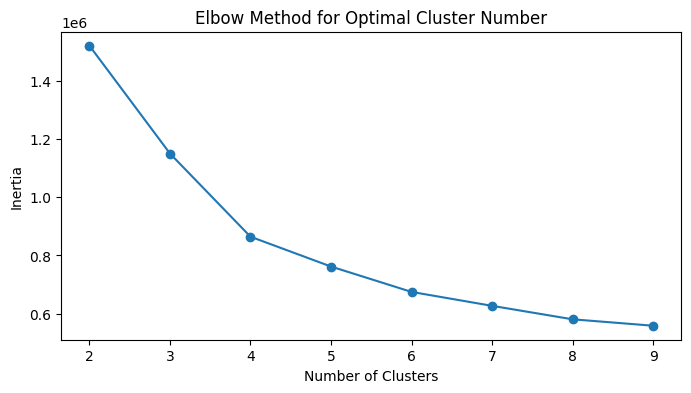

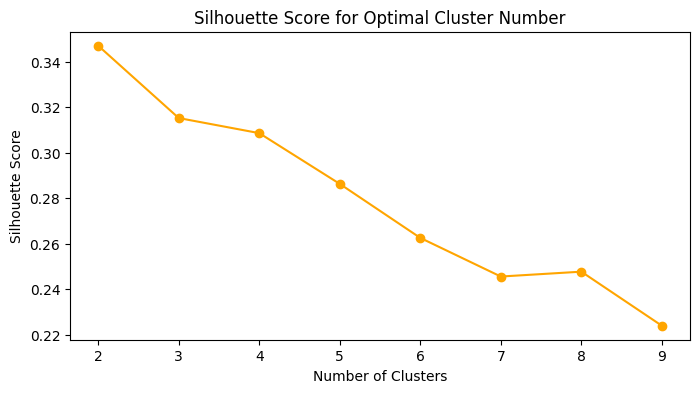

Silhouette Score untuk 2 cluster: 0.3471


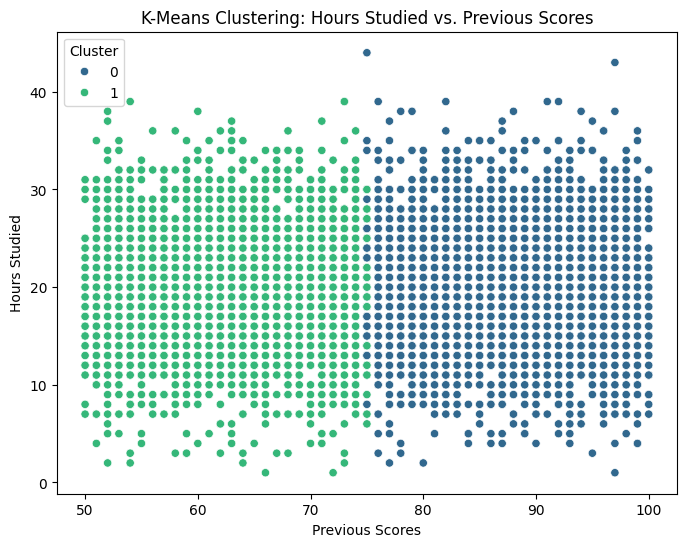

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Memilih fitur
X = df.drop(columns=['Exam_Score'])

# Encoding fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

# Menentukan jumlah cluster optimal menggunakan elbow method
inertia = []
silhouette_scores = []
for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
    # Hitung silhouette score
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot elbow method untuk membantu menentukan jumlah klaster yang optimal
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

# Plot silhouette score untuk membantu menentukan jumlah klaster yang optimal
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Cluster Number')
plt.show()

# Pengelompokan menggunakan K-Means dengan jumlah cluster yang telah ditentukan sebelumnya, yaitu 2
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(X)

# Menambahkan hasil kluster ke dalam dataset
df['cluster'] = kmeans.labels_

# Evaluasi akhir dengan silhouette score untuk jumlah cluster yang dipilih
final_silhouette_score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score untuk {optimal_clusters} cluster: {final_silhouette_score:.4f}')

# Visualisasi 1: Previous_Scores vs Hours_Studied
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Previous_Scores', y='Hours_Studied', hue='cluster', palette='viridis', data=df)
plt.title('K-Means Clustering: Hours Studied vs. Previous Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Hours Studied')
plt.legend(title='Cluster')
plt.show()